In [20]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Step 2: Load dataset
df = pd.read_csv("loan_data.csv")

In [22]:
# Step 3: Clean column names
df.columns = df.columns.str.strip()

In [23]:
# Step 4: Create target column (1 = defaulted, 0 = fully paid)
df["loan_default"] = df["Loan Status"].apply(lambda x: 1 if x == "Charged Off" else 0)

In [24]:
# Step 5: Drop unnecessary ID columns
df = df.drop(["Loan ID", "Customer ID", "Loan Status"], axis=1)

In [25]:
# Step 6: Handle missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [26]:
# Step 7: Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

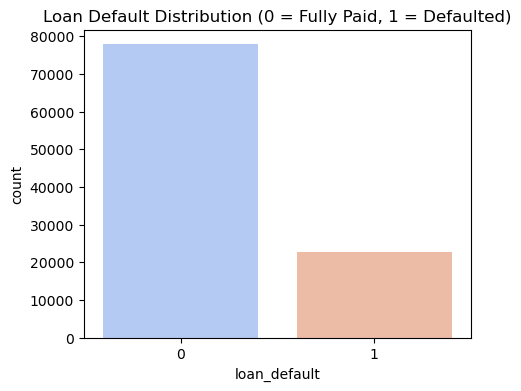

In [27]:
### VISUALIZATIONS
# 1. Distribution of Loan Default
plt.figure(figsize=(5,4))
sns.countplot(x="loan_default", data=df, palette="coolwarm")
plt.title("Loan Default Distribution (0 = Fully Paid, 1 = Defaulted)")
plt.show()

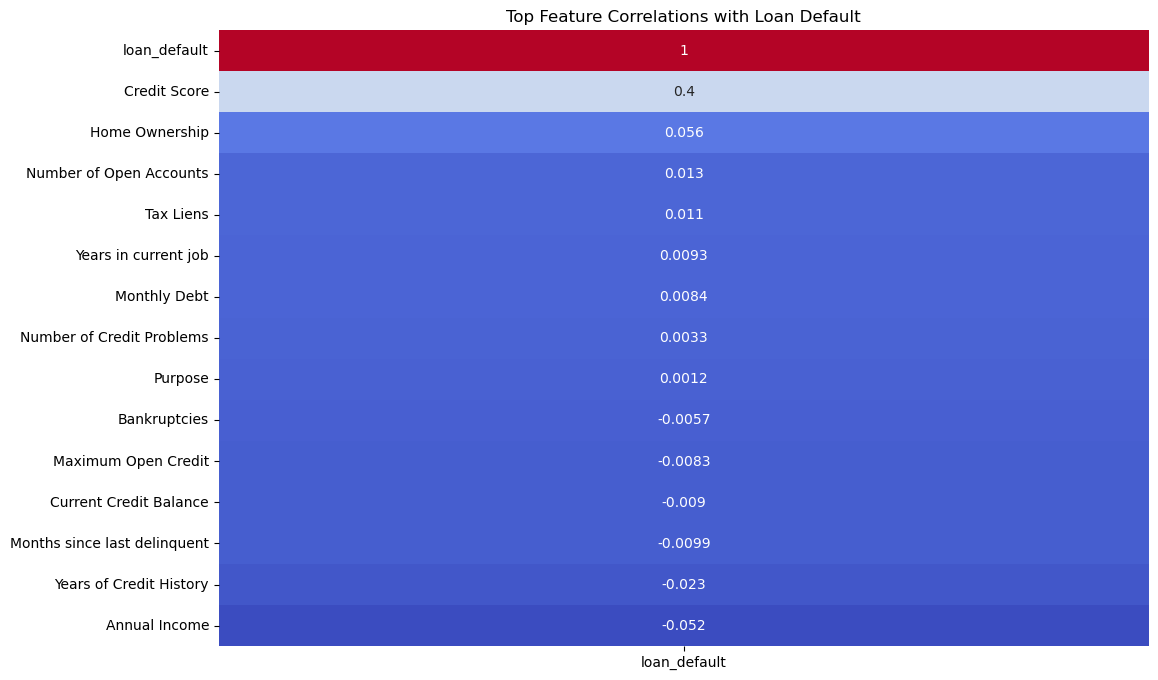

In [28]:
# 2. Correlation Heatmap (top 15 features only for readability)
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr.nlargest(15, "loan_default")["loan_default"].to_frame(),
            annot=True, cmap="coolwarm", cbar=False)
plt.title("Top Feature Correlations with Loan Default")
plt.show()

In [15]:
# Step 8: Split features and target
X = df.drop("loan_default", axis=1)
y = df["loan_default"]

In [16]:
# Step 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Step 10: Build Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Step 11: Predictions
y_pred = model.predict(X_test)

In [19]:
# Step 12: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8184848032631945

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89     15502
           1       0.89      0.24      0.37      4601

    accuracy                           0.82     20103
   macro avg       0.85      0.61      0.63     20103
weighted avg       0.83      0.82      0.78     20103



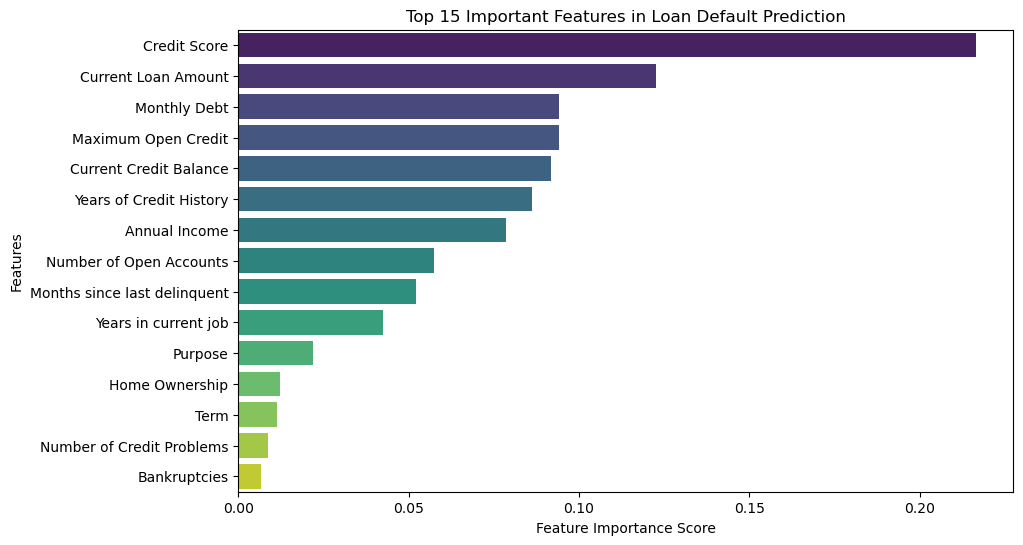

In [29]:
# 3. Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 15 Important Features in Loan Default Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

In [30]:
import os
print(os.getcwd())

C:\Users\admin
